### 4. Evaluation

In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv('customer_chun.csv')

df.columns = df.columns.str.lower().str.replace(' ','_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ','_')

df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

df.churn = (df.churn == 'yes').astype(int)

In [4]:
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,0
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50,0
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,1
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,0
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,1


In [5]:
df_full_train, df_test = train_test_split(df, test_size= 0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size= 0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

In [6]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

categorical = [ 'gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [7]:
dv = DictVectorizer()

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression()
model.fit(X_train, y_train)

c:\Users\HP PROBOOK640\Documents\Machine Learning Course\ml-zoomcamp\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [8]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y__pred = model.predict_proba(X_val)[: , 1]
churn_decision = (y__pred >= 0.5)
(churn_decision == y_val).mean()

0.8034066713981547

#### Accuracy and Dummy

In [9]:
from sklearn.metrics import accuracy_score

In [10]:
threshold = np.linspace(0, 1, 21)

scores = []

for t in threshold:
    #churn_decision = (y__pred >= t)
    #score = (churn_decision == y_val).mean()
    score = accuracy_score(y_val, y__pred >=t)
    print('%.2f %.3f' %(t, score))
    scores.append(score)

0.00 0.274
0.05 0.509
0.10 0.592
0.15 0.667
0.20 0.710
0.25 0.739
0.30 0.760
0.35 0.772
0.40 0.785
0.45 0.794
0.50 0.803
0.55 0.801
0.60 0.795
0.65 0.786
0.70 0.766
0.75 0.744
0.80 0.735
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


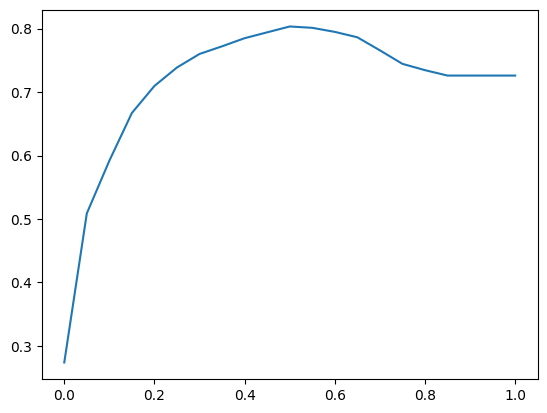

In [11]:
plt.plot(threshold, scores)

In [12]:
from collections import Counter

In [13]:
Counter(y__pred >= 1)

Counter({False: 1409})

#### Confusion Table

In [14]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [15]:
t = 0.5

predict_positive = (y__pred >= t)
predict_negative = (y__pred < t)

In [16]:
tp = (actual_positive & predict_positive).sum()
tn = (actual_negative & predict_negative).sum()

tp , tn

(210, 922)

In [17]:
fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

fn, fp

(176, 101)

In [18]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])

confusion_matrix

array([[922, 101],
       [176, 210]])

In [19]:
(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.65, 0.07],
       [0.12, 0.15]])

In [20]:
confusion_matrix

array([[922, 101],
       [176, 210]])

#### Precison and Recall

In [21]:
# PRECISION 
p = tp/(tp + fp)
p

0.6752411575562701

In [22]:
# RECALL
r = tp/(tp + fn)
r

0.5440414507772021

#### ROC Curve

##### TPR & FPR

In [23]:
tpr = tp / (fn + tp)
tpr

0.5440414507772021

In [24]:
fpr = fp / (tn + fp)
fpr

0.09872922776148582

In [25]:
scores = []

threshold = np.linspace(0, 1, 101)

for t in threshold:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    predict_positive = (y__pred >= t)
    predict_negative = (y__pred < t)

    tp = (actual_positive & predict_positive).sum()
    tn = (actual_negative & predict_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    scores.append((t, tp, fp, fn, tn))
    

In [26]:
columns = ['threshold',  'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)

df_scores['tpr'] = df_scores.tp / (df_scores.fn + df_scores.tp)
df_scores['fpr'] = df_scores.fp / (df_scores.tn + df_scores.fp)

In [27]:
df_scores[ : :10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,366,555,20,468,0.948187,0.542522
20,0.2,333,356,53,667,0.862694,0.347996
30,0.3,284,236,102,787,0.735751,0.230694
40,0.4,249,166,137,857,0.645078,0.162268
50,0.5,210,101,176,922,0.544041,0.098729
60,0.6,150,53,236,970,0.388601,0.051808
70,0.7,76,20,310,1003,0.196891,0.019550
80,0.8,13,1,373,1022,0.033679,0.000978
90,0.9,0,0,386,1023,0.000000,0.000000


In [28]:
df_scores['tpr'] = df_scores.tp / (df_scores.fn + df_scores.tp)
df_scores['fpr'] = df_scores.fp / (df_scores.tn + df_scores.fp)
df_scores[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,366,555,20,468,0.948187,0.542522
20,0.2,333,356,53,667,0.862694,0.347996
30,0.3,284,236,102,787,0.735751,0.230694
40,0.4,249,166,137,857,0.645078,0.162268
50,0.5,210,101,176,922,0.544041,0.098729
60,0.6,150,53,236,970,0.388601,0.051808
70,0.7,76,20,310,1003,0.196891,0.019550
80,0.8,13,1,373,1022,0.033679,0.000978
90,0.9,0,0,386,1023,0.000000,0.000000


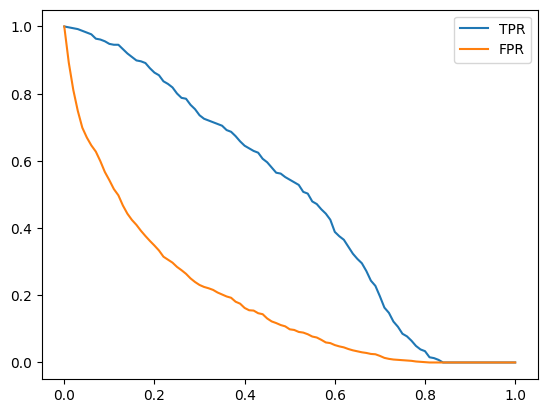

In [29]:
plt.plot(df_scores.threshold, df_scores.tpr, label = 'TPR')
plt.plot(df_scores.threshold, df_scores.fpr, label = 'FPR')
plt.legend()

#### Random Model

In [30]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1, len(y_val))

In [31]:
((y_rand >= 0.5) == y_val).mean()

0.5017743080198722

In [32]:
def tpr_fpr_dataframe (y_val, y__pred):
    scores = []

    threshold = np.linspace(0, 1, 101)

    for t in threshold:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y__pred >= t)
        predict_negative = (y__pred < t)

        tp = (actual_positive & predict_positive).sum()
        tn = (actual_negative & predict_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

        columns = ['threshold',  'tp', 'fp', 'fn', 'tn']

    df_scores = pd.DataFrame(scores, columns=columns)

    df_scores['tpr'] = df_scores.tp / (df_scores.fn + df_scores.tp)
    df_scores['fpr'] = df_scores.fp / (df_scores.tn + df_scores.fp)

    return df_scores

In [33]:
df_rand = tpr_fpr_dataframe(y_val, y_rand)

In [34]:
df_rand[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,347,923,39,100,0.898964,0.902248
20,0.2,307,822,79,201,0.795337,0.803519
30,0.3,276,724,110,299,0.715026,0.707722
40,0.4,237,624,149,399,0.613990,0.609971
50,0.5,202,518,184,505,0.523316,0.506354
60,0.6,161,409,225,614,0.417098,0.399804
70,0.7,121,302,265,721,0.313472,0.295210
80,0.8,78,206,308,817,0.202073,0.201369
90,0.9,40,101,346,922,0.103627,0.098729


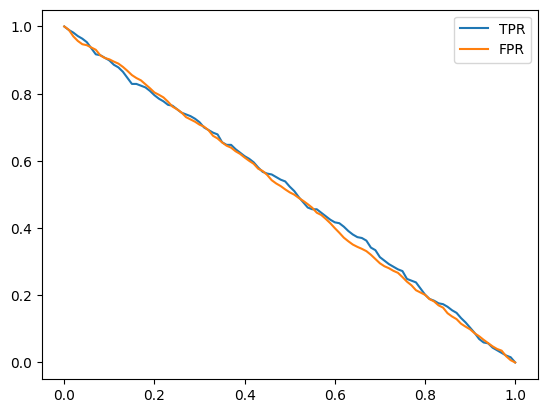

In [35]:
plt.plot(df_rand.threshold, df_rand.tpr, label = 'TPR')
plt.plot(df_rand.threshold, df_rand.fpr, label = 'FPR')
plt.legend()

#### Ideal Model 

In [36]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()
num_neg, num_pos

(1023, 386)

In [37]:
y_ideal = np.repeat([0,1], [num_neg, num_pos])
y_ideal

array([0, 0, 0, ..., 1, 1, 1])

In [38]:
y_ideal_pred = np.linspace(0, 1, len(y_val))

In [39]:
((y_ideal_pred >= 0.726) == y_ideal).mean()

1.0

In [40]:
df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)

In [41]:
df_ideal[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,386,882,0,141,1.000000,0.862170
20,0.2,386,741,0,282,1.000000,0.724340
30,0.3,386,600,0,423,1.000000,0.586510
40,0.4,386,459,0,564,1.000000,0.448680
50,0.5,386,319,0,704,1.000000,0.311828
60,0.6,386,178,0,845,1.000000,0.173998
70,0.7,386,37,0,986,1.000000,0.036168
80,0.8,282,0,104,1023,0.730570,0.000000
90,0.9,141,0,245,1023,0.365285,0.000000


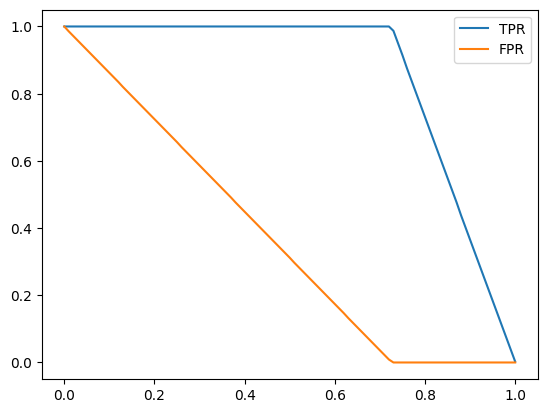

In [42]:
plt.plot(df_ideal.threshold, df_ideal.tpr, label = 'TPR')
plt.plot(df_ideal.threshold, df_ideal.fpr, label = 'FPR')
plt.legend()

#### Putting everything together

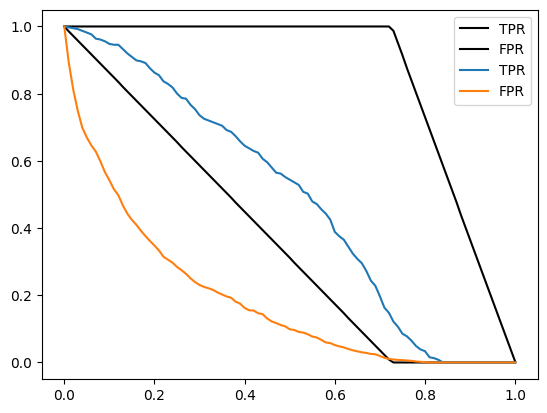

In [43]:
plt.plot(df_ideal.threshold, df_ideal.tpr, label = 'TPR', color= 'black')
plt.plot(df_ideal.threshold, df_ideal.fpr, label = 'FPR', color= 'black')

plt.plot(df_scores.threshold, df_scores.tpr, label = 'TPR')
plt.plot(df_scores.threshold, df_scores.fpr, label = 'FPR')

plt.legend()



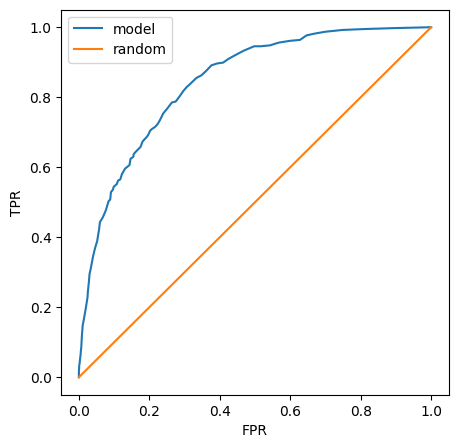

In [44]:
plt.figure(figsize=(5,5))

plt.plot(df_scores.fpr, df_scores.tpr, label='model')
plt.plot([0,1], [0,1], label='random')
#plt.plot(df_rand.fpr, df_rand.tpr, label='random')
#plt.plot(df_ideal.fpr, df_ideal.tpr, label= 'ideal')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

In [45]:
from sklearn.metrics import roc_curve

In [46]:
fpr, tpr, thresholds =roc_curve(y_val, y__pred)

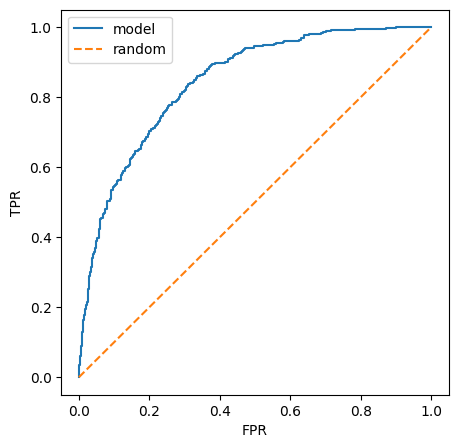

In [47]:
plt.figure(figsize=(5,5))

plt.plot(fpr, tpr, label='model')
plt.plot([0,1], [0,1], label='random', linestyle= '--')
#plt.plot(df_rand.fpr, df_rand.tpr, label='random')
#plt.plot(df_ideal.fpr, df_ideal.tpr, label= 'ideal')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

#### ROC AUC

In [48]:
from sklearn.metrics import auc

In [49]:
auc(fpr, tpr)

0.843792259887864

In [50]:
fpr, tpr, thresholds =roc_curve(y_val, y__pred)
auc(fpr, tpr)

0.843792259887864

In [51]:
from sklearn.metrics import roc_auc_score

In [52]:
roc_auc_score(y_val, y__pred)

0.843792259887864

In [53]:
neg = y__pred[y_val == 0]
pos = y__pred[y_val == 1]

In [54]:
import random

In [55]:
n = 100000
success = 0

for i in range (n):
    pos_idx = random.randint(0, len(pos)-1)
    neg_idx = random.randint(0, len(neg)-1)

    if pos[pos_idx] > neg[neg_idx]:
        success = success + 1

success / n

0.84412

In [56]:
# using numpy
n = 10000

np.random.seed(1)
pos_idx = np.random.randint(0, len(pos), size = n)
neg_idx = np.random.randint(0, len(neg), size= n)

(pos[pos_idx] > neg[neg_idx]).mean()

0.8411

#### K-fold Cross validation

In [57]:
def train(df_train, y_train, C=1):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)

    return dv, model

In [58]:
dv, model = train(df_train, y_train, C=0.001)

In [59]:
def predict (df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [60]:
y_pred = predict(df_val, dv, model)

In [61]:
from sklearn.model_selection import KFold

In [62]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

In [63]:
from tqdm.auto import tqdm

c:\Users\HP PROBOOK640\Documents\Machine Learning Course\ml-zoomcamp\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [64]:
n_splits = 5

for C in tqdm([ 0.001, 0.1, 0.5, 1, 5, 10]):
    scores = []

    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    for train_idx, val_idx in tqdm(kfold.split(df_full_train),total= n_splits ):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.churn.values 
        y_val = df_val.churn.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/6 [00:00<?, ?it/s]

 17%|█▋        | 1/6 [00:03<00:16,  3.34s/it]

0.001 0.825 +- 0.009


 33%|███▎      | 2/6 [00:06<00:13,  3.36s/it]

0.1 0.840 +- 0.008


 50%|█████     | 3/6 [00:09<00:09,  3.08s/it]

0.5 0.841 +- 0.006


 67%|██████▋   | 4/6 [00:11<00:05,  2.85s/it]

1 0.840 +- 0.008


 83%|████████▎ | 5/6 [00:14<00:02,  2.83s/it]

5 0.840 +- 0.008


100%|██████████| 6/6 [00:17<00:00,  2.86s/it]

10 0.841 +- 0.008


In [65]:
len(train_idx), len(val_idx)

(4508, 1126)

In [66]:
df_train = df_full_train.iloc[train_idx]
df_val = df_full_train.iloc[val_idx]

In [67]:
print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))

0.841 +- 0.008


In [68]:
dv, model = train(df_full_train, df_full_train.churn.values, C=1)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
auc

0.8572386167896259

In [70]:
df_val.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
3881,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3282,0330-bgyze,male,0,yes,no,60,yes,yes,fiber_optic,no,...,yes,no,yes,yes,one_year,no,bank_transfer_(automatic),102.50,6157.60,0
3177,1814-wfgvs,male,0,yes,yes,72,no,no_phone_service,dsl,yes,...,yes,yes,yes,no,two_year,no,mailed_check,48.90,3527.00,0
4674,0980-fexwf,male,0,yes,yes,26,yes,no,dsl,no,...,yes,no,no,no,one_year,no,mailed_check,50.35,1285.80,0
6060,4884-zthvf,female,1,no,no,8,yes,no,fiber_optic,no,...,no,no,yes,no,month-to-month,yes,electronic_check,87.10,713.60,0


In [72]:
df_val.iloc[20]

customerid                       3454-jfubc
gender                                 male
seniorcitizen                             1
partner                                  no
dependents                               no
tenure                                   68
phoneservice                            yes
multiplelines                            no
internetservice                          no
onlinesecurity          no_internet_service
onlinebackup            no_internet_service
deviceprotection        no_internet_service
techsupport             no_internet_service
streamingtv             no_internet_service
streamingmovies         no_internet_service
contract                           two_year
paperlessbilling                        yes
paymentmethod       credit_card_(automatic)
monthlycharges                         20.0
totalcharges                         1396.0
churn                                     0
Name: 6942, dtype: object